In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import datetime
import plotly.figure_factory as ff


# Loading the data from GDrive

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Walmart

/content/gdrive/MyDrive/Colab Notebooks/Walmart


In [ ]:
pwd

'/content/gdrive/MyDrive/Colab Notebooks/Walmart'

In [ ]:
!ls

features.csv  sampleSubmission.csv  stores.csv	test.csv  train.csv


In [ ]:
raw_features=pd.read_csv("features.csv")
raw_stores=pd.read_csv("stores.csv")
raw_data=pd.read_csv("train.csv")

# Understanding the Data and getting an impression on what we are actually working with

In [ ]:
print(raw_features.shape)
print(raw_stores.shape)
print(raw_data.shape)

(8190, 12)
(45, 3)
(421570, 5)


In [ ]:
raw_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
raw_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
raw_features.isna().sum().sort_values(ascending=True)

Store              0
Date               0
Temperature        0
Fuel_Price         0
IsHoliday          0
CPI              585
Unemployment     585
MarkDown5       4140
MarkDown1       4158
MarkDown3       4577
MarkDown4       4726
MarkDown2       5269
dtype: int64

In [ ]:
#so as we can see that the dataset containg stores data and training dataset are clean without NA.. 
#So lets proceed with the features dataset 
# Things that we know from the dataset provider about the features dataset and Initial Impressions
# 1) Duration of the dataset is from 2010-02-05 to 2012-11-01 (5th Feb 2010 - 1st November 2012 )
# 2) We have also been told by walmart that the markdown values have been only recorded after November 2011
# 3) Also have been informed that not all stores have markdowns at the same time 
# 4) The above two point explains the huge number of Null Values for Markdowns as 
#    the timeframe for which markdowns have not been recorded at all is almost half the duration of the dataset given to us.. on top of those we have 3rd point
# Lets come to markdown after dealing with other NA's
# 5) So essesntialy the missing data is from CPI and Unemployment
#
#

In [ ]:
raw_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
#Immediately the things that can be observed from the above describe function are : 
# There are negative values for markdowns M1,M2,M3,M5 which usually should be positive and thus have to be tweaked and has to be check 
#  lets try to visualize the cpi distribution and Unemployment distribution

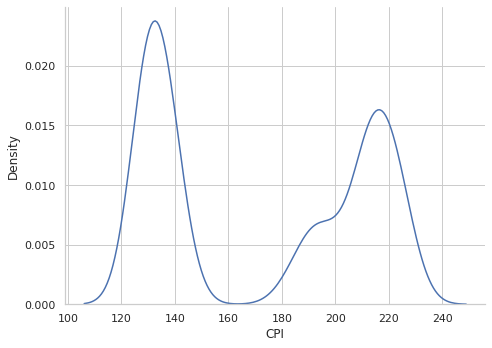

In [ ]:
sns.displot(
    data=raw_features,
    x="CPI", 
    kind="kde",
    aspect=1.4,
   
    
)

In [ ]:
# Imputing mean values for cpi can change the distribution of the dataset as CPI is not distributed normally 

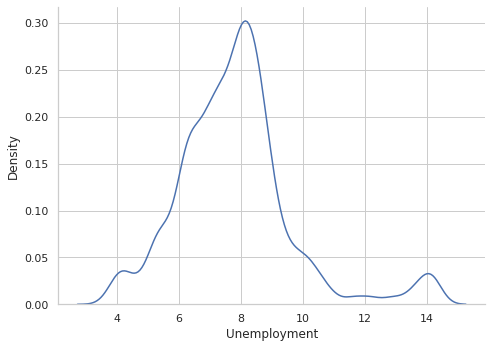

In [ ]:
sns.displot(
    data=raw_features,
    x="Unemployment", 
    kind="kde",
    aspect=1.4,
    
)

In [ ]:
print("Mean :",raw_features["CPI"].mean())
print("Median :",raw_features["CPI"].median())
print("Mode :",raw_features["CPI"].mode())

Mean : 172.46080918276078
Median : 182.7640032
Mode : 0    132.716097
dtype: float64


In [ ]:
print("Mean :",raw_features["Unemployment"].mean())
print("Median :",raw_features["Unemployment"].median())
print("Mode :",raw_features["Unemployment"].mode())

Mean : 7.826821038790305
Median : 7.806
Mode : 0    8.099
dtype: float64


In [ ]:
"""sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=raw_features["Unemployment"])"""

'sns.set_theme(style="whitegrid")\nax = sns.boxplot(x=raw_features["Unemployment"])'

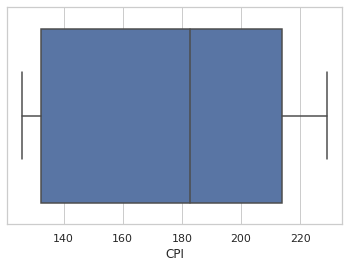

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=raw_features["CPI"])

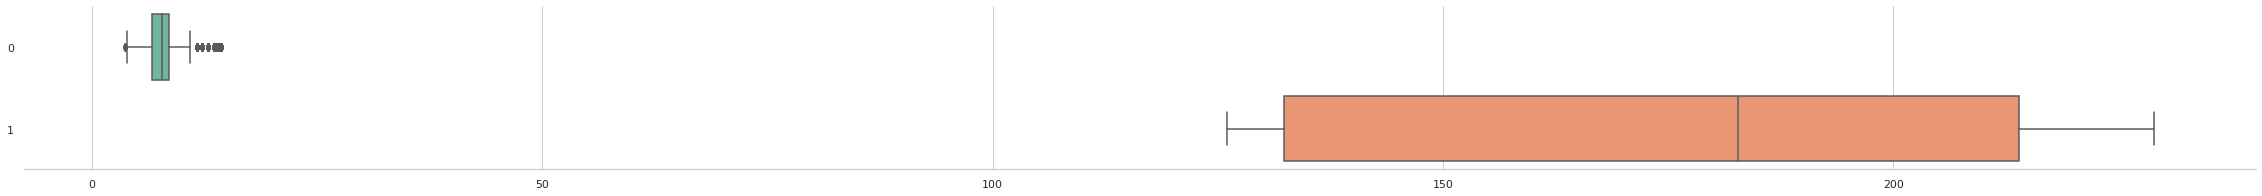

In [ ]:
fig, ax = plt.subplots(figsize=(40, 3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax = sns.boxplot(data=[raw_features["Unemployment"],raw_features["CPI"]], orient="h", palette="Set2")
plt.show()

In [ ]:
raw_features[(raw_features['CPI'].isnull())&(raw_features['Unemployment'].isnull())]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
169,1,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False
170,1,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False
171,1,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False
172,1,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False
173,1,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
#from the above we can see that all the missing values of CPI and Unemployment are from the same rows 
# where there is NA data when compared between CPI and Unemployment = 585 rows which is the same as the amount of missing values of CPI and Unemployment
# So What we will be doing for now is having two different approach and those would be :
# First one would be removing the NA values as the number of rows we would be losing would be a pretty acceptable loss of data (7.14 % of the data would be removed) without skewing the data 
# Second one would be imputing the values , Unemployment would take a median , CPI since it being bimodal distribution have to be imputed 

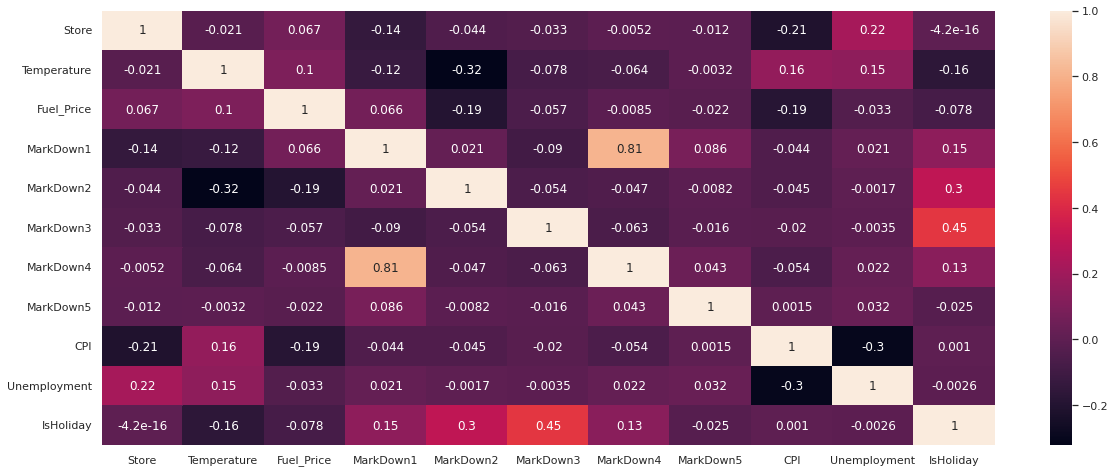

In [ ]:
fig, xl = plt.subplots(figsize=(20, 8))
xl=sns.heatmap(raw_features.corr(),annot=True)
plt.show()

In [ ]:
"""fig, ax = plt.subplots(figsize=(20, 8))
ax=sns.heatmap(features_scenario1.corr(),annot=True)
plt.show()"""

'fig, ax = plt.subplots(figsize=(20, 8))\nax=sns.heatmap(features_scenario1.corr(),annot=True)\nplt.show()'

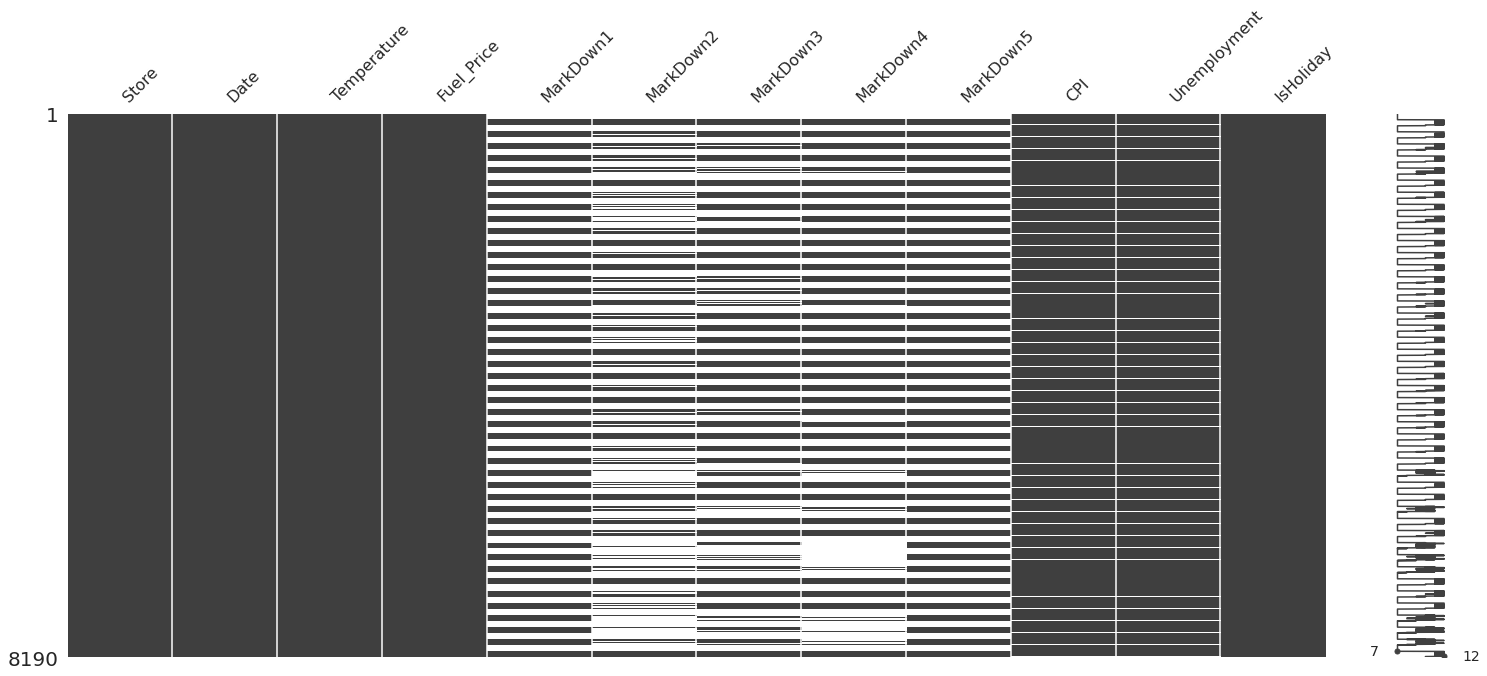

In [ ]:
msno.matrix(raw_features)

In [ ]:
features_drop=raw_features.dropna(subset=["CPI"])

In [ ]:
features_drop.shape

(7605, 12)

In [ ]:
features_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         7605 non-null   int64  
 1   Date          7605 non-null   object 
 2   Temperature   7605 non-null   float64
 3   Fuel_Price    7605 non-null   float64
 4   MarkDown1     3449 non-null   float64
 5   MarkDown2     2441 non-null   float64
 6   MarkDown3     3084 non-null   float64
 7   MarkDown4     2974 non-null   float64
 8   MarkDown5     3465 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     7605 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 720.4+ KB


In [ ]:
features_drop["Date"]=pd.to_datetime(features_drop["Date"])

In [ ]:
features_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         7605 non-null   int64         
 1   Date          7605 non-null   datetime64[ns]
 2   Temperature   7605 non-null   float64       
 3   Fuel_Price    7605 non-null   float64       
 4   MarkDown1     3449 non-null   float64       
 5   MarkDown2     2441 non-null   float64       
 6   MarkDown3     3084 non-null   float64       
 7   MarkDown4     2974 non-null   float64       
 8   MarkDown5     3465 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     7605 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 720.4 KB


In [ ]:
split_date = '2011-11-25 23:00:00'


In [ ]:
type(split_date)

str

In [ ]:
df_training = features_drop.loc[features_drop['Date'] <= split_date]
df_test = features_drop.loc[features_drop['Date'] > split_date]

In [ ]:
df_test.shape

(3330, 12)

In [ ]:
df_test.head(100)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
95,1,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
97,1,2011-12-16,51.63,3.159,5011.32,67.00,347.37,225.79,4011.37,219.179453,7.866,False
98,1,2011-12-23,47.96,3.112,2725.36,40.48,634.70,24.90,2739.43,219.357722,7.866,False
99,1,2011-12-30,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,7.866,True
...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,2012-04-27,67.20,3.814,3076.68,NaN,38.32,108.71,2708.90,221.255812,6.891,False
299,2,2012-05-04,76.73,3.749,23731.47,NaN,78.09,7931.42,4443.52,221.309517,6.891,False
300,2,2012-05-11,73.87,3.688,16519.50,NaN,117.38,5131.02,3634.25,221.363221,6.891,False
301,2,2012-05-18,71.27,3.630,9262.12,NaN,42.67,3694.80,4612.01,221.380331,6.891,False


In [ ]:
features_scenario1=df_test

In [ ]:
4275+3330

7605

In [ ]:
features_drop.shape

(7605, 12)

In [ ]:
features_scenario1.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1         15
MarkDown2       1013
MarkDown3        370
MarkDown4        466
MarkDown5          0
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

In [ ]:
raw_features_merge_with_store=raw_features.merge(raw_stores,how="inner",on="Store")

In [ ]:
raw_features_merge_with_store.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [ ]:
featuresdrop_merge_with_store=features_drop.merge(raw_stores,how="inner",on="Store")

In [ ]:
featuresdrop_merge_with_store.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.00000
mean,23.000000,58.297325,3.389624,3331.850502,1257.632682,821.902856,1310.043445,1939.701669,172.460809,7.826821,130287.60000
std,12.988027,18.709862,0.441461,7500.751025,5695.768975,7822.371717,4778.286282,9717.363653,39.738346,1.877259,63116.26787
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000,34875.00000
25%,12.000000,44.720000,3.001000,0.000000,0.000000,0.000000,0.000000,0.000000,132.364839,6.634000,70713.00000
50%,23.000000,59.250000,3.494000,0.000000,0.000000,0.000000,0.000000,0.000000,182.764003,7.806000,126512.00000
75%,34.000000,72.620000,3.742000,4167.270000,42.200000,14.740000,564.100000,2511.400000,213.932412,8.567000,202307.00000
max,45.000000,100.140000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.00000


In [ ]:
featuresdrop_merge_with_store['MarkDown1'] = featuresdrop_merge_with_store['MarkDown1'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown2'] = featuresdrop_merge_with_store['MarkDown2'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown3'] = featuresdrop_merge_with_store['MarkDown3'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown4'] = featuresdrop_merge_with_store['MarkDown4'].replace(np.nan, 0)
featuresdrop_merge_with_store['MarkDown5'] = featuresdrop_merge_with_store['MarkDown5'].replace(np.nan, 0)

In [ ]:
features_scenario_dropand0=featuresdrop_merge_with_store

In [ ]:
features_scenario_dropand0.shape #This is the scenario where CPI and Unemployment Null values have been dropped and nas have been converted to 0 for markdown

(7605, 14)

In [ ]:
x1=features_scenario_dropand0["MarkDown1"]
x2=features_scenario_dropand0["MarkDown2"]
x3=features_scenario_dropand0["MarkDown3"]
x4=features_scenario_dropand0["MarkDown4"]
x5=features_scenario_dropand0["MarkDown5"]

hist_data=[x1,x2,x3,x4,x5]
group_labels=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

In [ ]:
#lets check how the train dataset is like 

In [ ]:
raw_data.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [ ]:
raw_data.shape

(421570, 5)

In [ ]:
# by above description  we can see that the data we have in the training file is for weekly sales 
# lets merge the data set with the processesd features dataset 

In [ ]:
df1=raw_data.merge(features_scenario_dropand0,)